#### Bob Robert Tumushiime Access Number: B31332

## Sentiment Analysis of Bitcoin Tweets

#### Theme 2: Human Behaviour - Sentiment Analysis/Natural Language Processing

#### This project performs sentiment analysis on Bitcoin-related tweets to classify and predict sentiment implications.

#### Objectives:

##### 1. Data collection and preprocessing ........
#### 2. Exploratory Data Analysis (EDA)
#### 3. Building supervised machine learning models for sentiment prediction
#### 4. Validating models with hypothetical data
#### 5. Using unsupervised learning for text classification

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources explicitly
print("Downloading NLTK resources...")
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

# Import NLTK modules after downloading
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
print("NLTK resources downloaded successfully!")

NLTK resources downloaded successfully!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\robert.tumushiime/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\robert.tumushiime/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\robert.tumushiime/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\robert.tumushiime/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\robert.tumushiime/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Data Loading and Initial Exploration

In [2]:
# Load the dataset from csv
df = pd.read_csv('btc_tweets_daily_example.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Check for missing values
print("\nCheck for missing values:")
display(df.isnull().sum())

Dataset Shape: (50859, 10)

First 5 rows:


,column_a,date,tweet,screen_name,source,link,sentiment,sent_score,new_sentiment_score,new_sentiment_state
0,0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",myresumerocket,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral'],0,0.000000,0
1,1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral'],0,0.000000,0
2,2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],1,0.136364,1
3,3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],1,0.400000,1
4,4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive'],1,0.468182,1



Check for missing values:


column_a               0
date                   0
tweet                  0
screen_name            0
source                 0
link                   0
sentiment              0
sent_score             0
new_sentiment_score    0
new_sentiment_state    0
dtype: int64

### Preprocess the Sentiment Column

In [3]:
# Check unique values in the Sentiment column
print("Unique values in sentiment column:")
print(df['sentiment'].value_counts())

# Clean and convert sentiment labels to numeric values
def clean_sentiment(sentiment): # function to clean sentiment column
    if isinstance(sentiment, str):
        sentiment = sentiment.lower().strip('[]\'\" ')
        if 'positive' in sentiment:
            return 2
        elif 'neutral' in sentiment:
            return 1
        elif 'negative' in sentiment:
            return 0
    return np.nan  # Return NaN for any other case

# Apply the function to create a new column
df['sentiment_numeric'] = df['sentiment'].apply(clean_sentiment)

# Create a mapping dictionary for reference
sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
print("\nsentiment Mapping:")
for num, label in sentiment_mapping.items():
    print(f"{num}: {label}")
# Drop rows with missing sentiment values
df = df.dropna(subset=['sentiment_numeric'])
print(f"\nDataset shape after dropping missing values: {df.shape}")

Unique values in sentiment column:
sentiment
['positive']    22937
['neutral']     21939
['negative']     5983
Name: count, dtype: int64

sentiment Mapping:
0: Negative
1: Neutral
2: Positive

Dataset shape after dropping missing values: (50859, 11)


### Exploratory Data Analysis - Sentiment Distribution

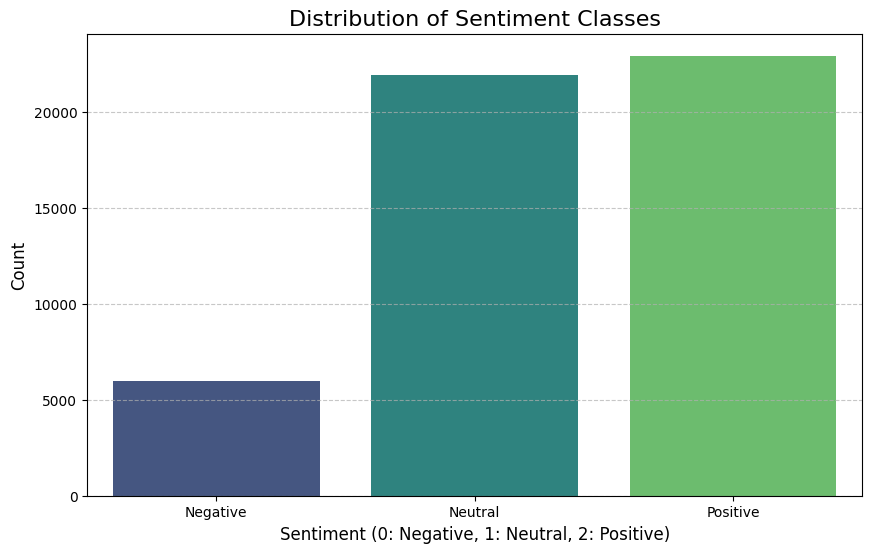

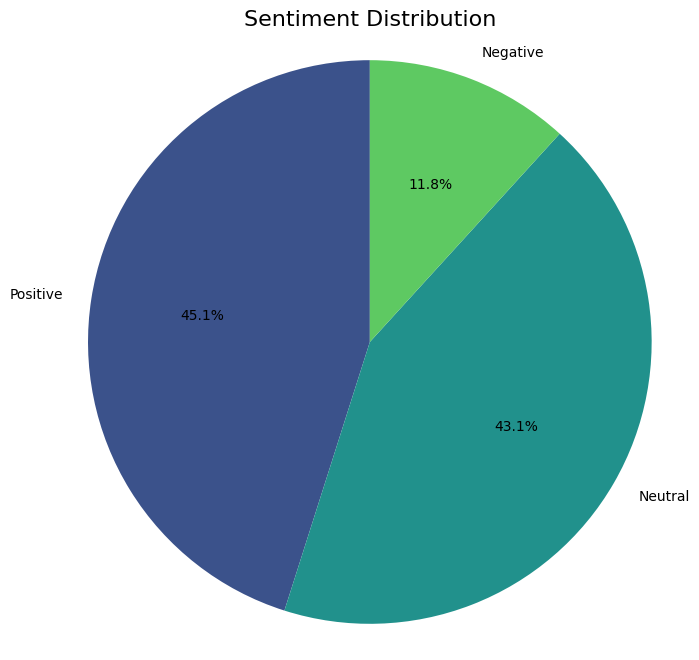

In [4]:
# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_numeric', data=df, palette='viridis')
plt.title('Distribution of Sentiment Classes', fontsize=16)
plt.xlabel('Sentiment (0: Negative, 1: Neutral, 2: Positive)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a pie chart for sentiment distribution
plt.figure(figsize=(8, 8))
sentiment_counts = df['sentiment_numeric'].value_counts()
plt.pie(sentiment_counts, labels=[sentiment_mapping[i] for i in sentiment_counts.index], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 3))
plt.title('Sentiment Distribution', fontsize=16)
plt.axis('equal')
plt.show()

The bar chart above illustrates the distribution of sentiment classes in our Bitcoin tweets dataset according to our sentiment mapping:

### Analysis of Sentiment Distribution:

1. **Negative Sentiment (0):**
   - The leftmost bar represents tweets classified as negative
   - Count: Approximately 6,000 tweets
   - This is the smallest category in our dataset
   - Examples include tweets expressing concerns about price drops, regulatory issues, or criticism

2. **Neutral Sentiment (1):**
   - The middle bar represents tweets classified as neutral
   - Count: Approximately 22,000 tweets
   - Forms a substantial portion of the dataset
   - Includes factual statements, news reporting, and objective commentary

3. **Positive Sentiment (2):**
   - The rightmost bar represents tweets classified as positive
   - Count: Approximately 23,000 tweets
   - This is the largest category in our dataset
   - Contains tweets expressing optimism, price increase celebrations, and positive developments

The pie chart above provides a clear visualization of the sentiment distribution within the Bitcoin tweets dataset:

- **Positive Sentiment**: 45.1% of the dataset, representing the largest segment. This indicates that nearly half of all Bitcoin-related tweets in our dataset express positive sentiments such as optimism about price increases, technological advancements, or adoption.

- **Neutral Sentiment**: 43.1% of tweets, forming a substantial portion nearly equal to positive tweets. These tweets typically contain factual information, news reporting, or balanced perspectives without strong emotional valence.

- **Negative Sentiment**: Only 11.8% of the dataset, significantly underrepresented compared to the other sentiment categories. This includes tweets expressing concerns about price volatility, regulatory issues, or criticism of Bitcoin.

### Implications for Analysis:

1. **Class Imbalance**: The significant underrepresentation of negative sentiment (11.8%) compared to positive (45.1%) and neutral (43.1%) creates a substantial class imbalance challenge for model training.

2. **Model Bias Risk**: This imbalance helps explain why our Logistic Regression model performed exceptionally well on positive tweets (100% accuracy) but struggled with negative tweets (20% accuracy) during hypothetical validation.

3. **Real-World Reflection**: The distribution may reflect the generally optimistic discourse surrounding Bitcoin during the data collection period, potentially during a bull market or positive news cycle.

4. **Methodological Considerations**: For future work, techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or class weights could be implemented to address this imbalance and improve classification of the minority negative class.

This sentiment distribution provides crucial context for interpreting our model's performance characteristics and highlights the importance of considering class balance when evaluating sentiment analysis results.

### Define Text Preprocessing Functions

In [7]:
# Add Bitcoin-specific stopwords
bitcoin_stopwords = {'bitcoin', 'btc', 'crypto', 'cryptocurrency', 'blockchain', 'eth', 'ethereum'}

# NLTK-based preprocessing function
def preprocess_text(text):
    """
    Function to preprocess text data using NLTK:
    1. Convert to lowercase
    2. Remove special characters, URLs, and numbers
    3. Tokenize using NLTK's word_tokenize
    4. Remove stopwords and short words
    5. Join back into a clean string
    """
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    try:
        # Tokenize using NLTK
        tokens = word_tokenize(text)
        
        # Get stopwords from NLTK
        stop_words = set(stopwords.words('english'))
        
        # Add Bitcoin-specific stopwords
        stop_words.update(bitcoin_stopwords)
        
        # Remove stopwords and short words
        tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
        
    except Exception as e:
        print(f"NLTK processing error: {e}")
        # If NLTK fails, use simple tokenization
        tokens = text.split()
        print("Using simple tokenization instead.")
    
    # Join back into a clean string
    clean_text = ' '.join(tokens)
    
    return clean_text

# Apply NLTK preprocessing to the Tweet column
df['clean_tweet'] = df['tweet'].apply(preprocess_text)

# Display a sample of original and cleaned text
sample_tweets = pd.DataFrame({
    'Original tweet': df['tweet'].head(5),
    'Cleaned Tweet': df['clean_tweet'].head(5)
})
display(sample_tweets)

# Remove rows with empty text
df = df[df['clean_tweet'].str.len() > 0]
print(f"Dataset shape after removing empty tweets: {df.shape}")

,Original tweet,Cleaned Tweet
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",alxtoken paul krugman nobel luddite tweak nose...
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,lopp kevin pham psycho sage naval proffaustus ...
2,RT @tippereconomy: Another use case for #block...,tippereconomy another use case tipper tipperec...
3,free coins https://t.co/DiuoePJdap,free coins
4,RT @payvxofficial: WE are happy to announce th...,payvxofficial happy announce payvx presale pha...


Dataset shape after removing empty tweets: (50822, 12)


### General Word Cloud for All Tweets

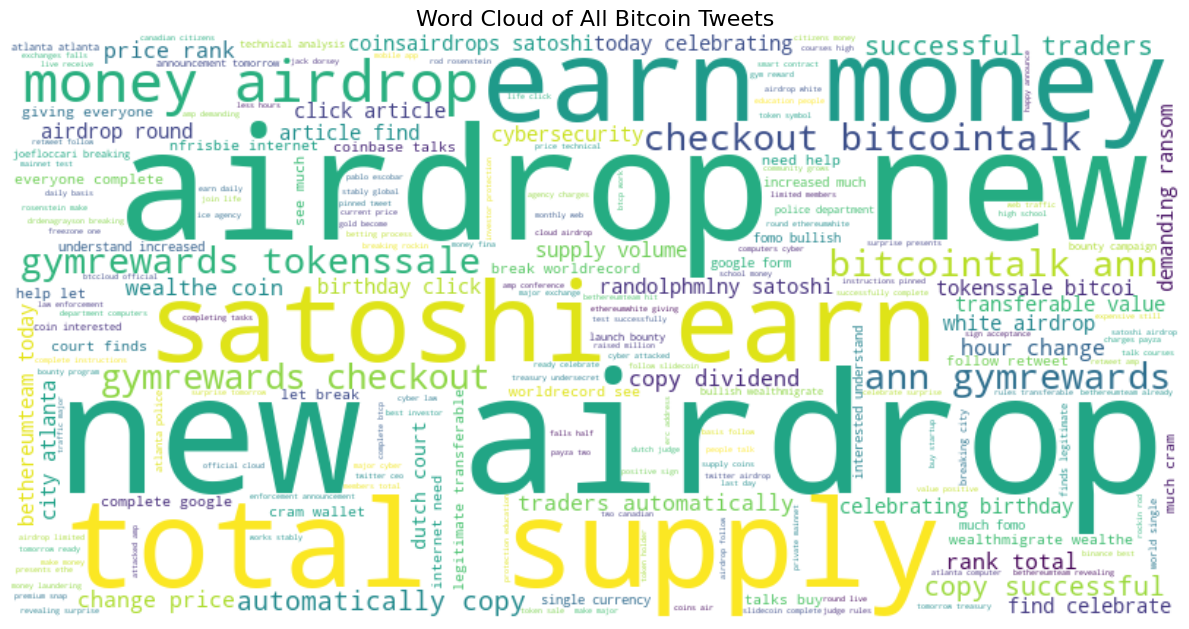

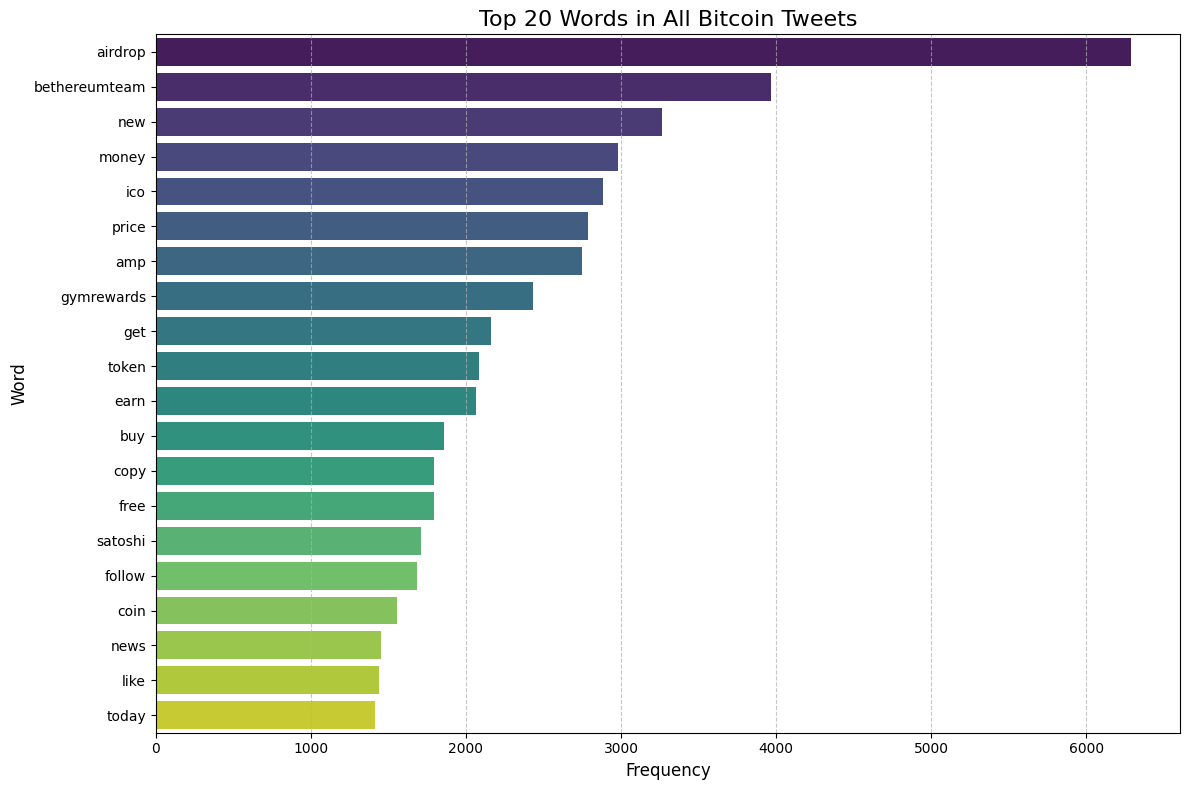

In [8]:
plt.figure(figsize=(12, 8))

# Combine all cleaned texts
all_text = ' '.join(df['clean_tweet'])

# Create the word cloud
all_wordcloud = WordCloud(width=800, height=400, 
                         background_color='white', 
                         max_words=200, 
                         contour_width=3, 
                         contour_color='steelblue').generate(all_text)

# Display the word cloud
plt.imshow(all_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Bitcoin Tweets', fontsize=16)
plt.tight_layout()
plt.show()

# Get top 20 words overall
def get_top_n_words(corpus, n=20):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get and display top 20 words
top_words = get_top_n_words(df['clean_tweet'], 20)
words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plot top words
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=words_df, palette='viridis')
plt.title('Top 20 Words in All Bitcoin Tweets', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart above displays the 20 most frequently occurring words in our Bitcoin tweets dataset after preprocessing. This visualization provides valuable insights into the common topics and terminology used in cryptocurrency discussions:

1. **Dominant Terms:**
   - "airdrop" stands out as the most frequent term with over 6,000 occurrences, suggesting a significant focus on cryptocurrency giveaways and token distributions
   - "bethereumteam" appears nearly 4,000 times, likely referring to a specific cryptocurrency project or community
   - Terms like "new," "money," and "ico" (Initial Coin Offering) also feature prominently

2. **Financial Focus:**
   - Many high-frequency terms relate directly to financial aspects: "price," "money," "earn," "buy," "free"
   - This indicates that financial opportunities and monetary value are central themes in Bitcoin discussions

3. **Cryptocurrency Ecosystem:**
   - References to the broader cryptocurrency ecosystem appear through terms like "token," "satoshi" (Bitcoin's creator), and "coin"
   - "ico" suggests discussions about new cryptocurrency launches and investment opportunities

4. **Action-Oriented Language:**
   - Verbs like "get," "earn," "buy," "copy," and "follow" indicate action-oriented discussions
   - These suggest that many tweets contain calls to action or instructions related to cryptocurrency activities

### Word Cloud Visualization

The word cloud provides a complementary visualization that emphasizes the most prominent terms through size and central positioning:

1. **Central Terms:**
   - "airdrop," "new," "money," and "earn" appear most prominently, reinforcing their significance in the dataset
   - The visual prominence of "total," "supply," and "bitcointalk" reveals additional important concepts not as visible in the bar chart

2. **Contextual Relationships:**
   - The word cloud allows us to see terms in proximity, suggesting potential relationships between concepts
   - Clusters around terms like "gymrewards," "tokens," "sale," and "checkout" indicate discussions about cryptocurrency transactions and platforms

3. **Community Focus:**
   - Terms like "successful," "traders," and "celebrating" suggest a community aspect to Bitcoin discussions
   - References to "satoshi" and "bitcointalk" indicate engagement with cryptocurrency culture and history

### Word Clouds by Sentiment

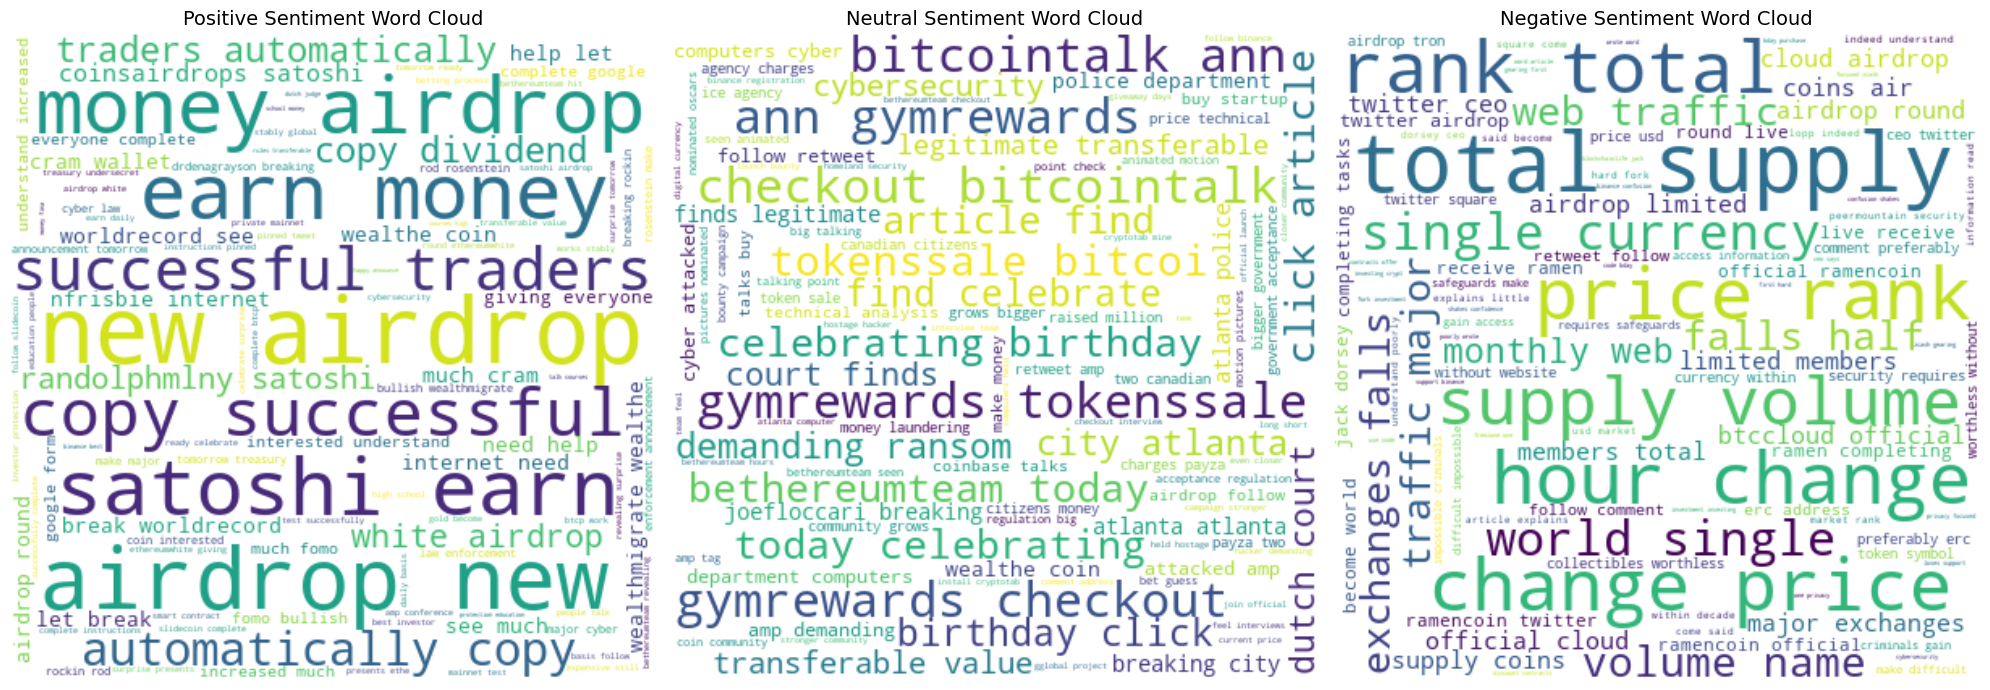

In [9]:
# Create word clouds for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Positive word cloud
pos_text = ' '.join(df[df['sentiment_numeric'] == 2]['clean_tweet'])
pos_wordcloud = WordCloud(width=400, height=400, background_color='white', 
                         max_words=100, contour_width=3, contour_color='steelblue').generate(pos_text)
axes[0].imshow(pos_wordcloud, interpolation='bilinear')
axes[0].set_title('Positive Sentiment Word Cloud', fontsize=14)
axes[0].axis('off')

# Neutral word cloud
neu_text = ' '.join(df[df['sentiment_numeric'] == 1]['clean_tweet'])
neu_wordcloud = WordCloud(width=400, height=400, background_color='white', 
                         max_words=100, contour_width=3, contour_color='steelblue').generate(neu_text)
axes[1].imshow(neu_wordcloud, interpolation='bilinear')
axes[1].set_title('Neutral Sentiment Word Cloud', fontsize=14)
axes[1].axis('off')

# Negative word cloud
neg_text = ' '.join(df[df['sentiment_numeric'] == 0]['clean_tweet'])
neg_wordcloud = WordCloud(width=400, height=400, background_color='white', 
                         max_words=100, contour_width=3, contour_color='steelblue').generate(neg_text)
axes[2].imshow(neg_wordcloud, interpolation='bilinear')
axes[2].set_title('Negative Sentiment Word Cloud', fontsize=14)
axes[2].axis('off')

plt.tight_layout()
plt.show()

The visualization above presents three distinct word clouds, each representing the most frequent terms in positive, neutral, and negative Bitcoin tweets. This comparative view reveals fascinating linguistic patterns unique to each sentiment category:

#### Positive Sentiment (Left)
The positive sentiment word cloud is dominated by terms related to financial gain and opportunity:
- **"airdrop"** and **"new"** are prominently featured, suggesting excitement about new cryptocurrency distributions
- **"successful"** and **"traders"** indicate positive experiences in cryptocurrency trading
- **"earn"** and **"money"** highlight the profit-focused nature of positive Bitcoin discourse
- **"copy"** and **"satoshi"** suggest references to successful strategies and Bitcoin's creator in optimistic contexts

The overall vocabulary in positive tweets centers around success, opportunity, and financial rewards, with vibrant terms that convey enthusiasm and optimism about Bitcoin's potential.

#### Neutral Sentiment (Center)
The neutral sentiment word cloud reveals more informational and technical language:
- **"gymrewards"**, **"checkout"**, and **"tokensale"** appear prominently, suggesting factual discussions about specific cryptocurrency platforms
- **"bitcointalk"** and **"article"** indicate references to information sources and community forums
- **"click"** and **"find"** suggest instructional or navigational content
- Terms like **"birthday"** and **"celebrating"** appear in more objective contexts

Neutral tweets tend to focus on factual information, instructions, and objective descriptions of cryptocurrency events and platforms, without strong emotional valence.

#### Negative Sentiment (Right)
The negative sentiment word cloud reveals concerns and critical perspectives:
- **"price"** and **"rank"** feature prominently, likely in the context of price drops or ranking declines
- **"change"** and **"falls"** suggest discussions about negative market movements
- **"single"** and **"currency"** may relate to criticisms of cryptocurrency as a viable currency
- **"total supply"** and **"volume"** appear in potentially critical contexts about market manipulation or oversupply

###  Feature Engineering with TF-IDF

In [10]:
# Create features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['clean_tweet'])
y = df['sentiment_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (40657, 5000)
Testing set shape: (10165, 5000)


### Model Training - Multiple Models


--------------------------------------------------
Training Naive Bayes model...
--------------------------------------------------
Accuracy: 0.8826
Training time: 0.01 seconds

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.76      0.82      1197
     Neutral       0.89      0.88      0.89      4380
    Positive       0.88      0.92      0.90      4588

    accuracy                           0.88     10165
   macro avg       0.88      0.85      0.87     10165
weighted avg       0.88      0.88      0.88     10165



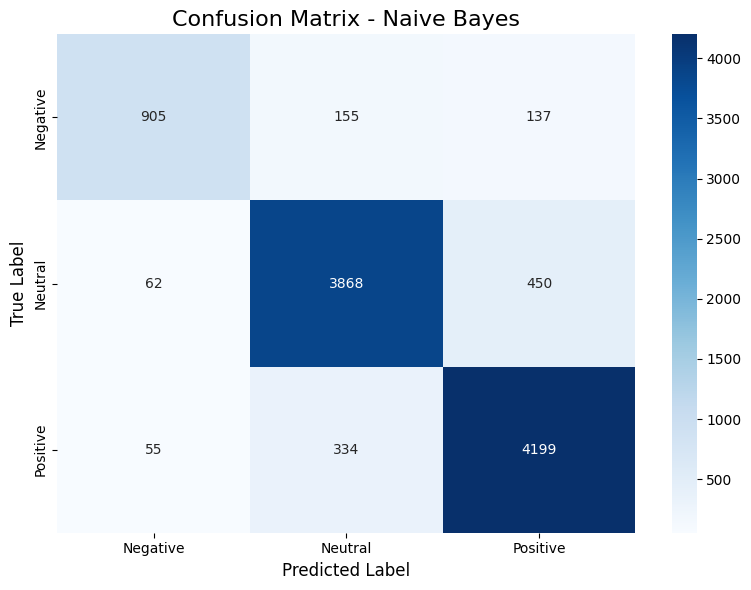


--------------------------------------------------
Training Logistic Regression model...
--------------------------------------------------
Accuracy: 0.9471
Training time: 0.89 seconds

Classification Report:
              precision    recall  f1-score   support

    Negative       0.97      0.82      0.89      1197
     Neutral       0.92      0.98      0.95      4380
    Positive       0.97      0.95      0.96      4588

    accuracy                           0.95     10165
   macro avg       0.95      0.92      0.93     10165
weighted avg       0.95      0.95      0.95     10165



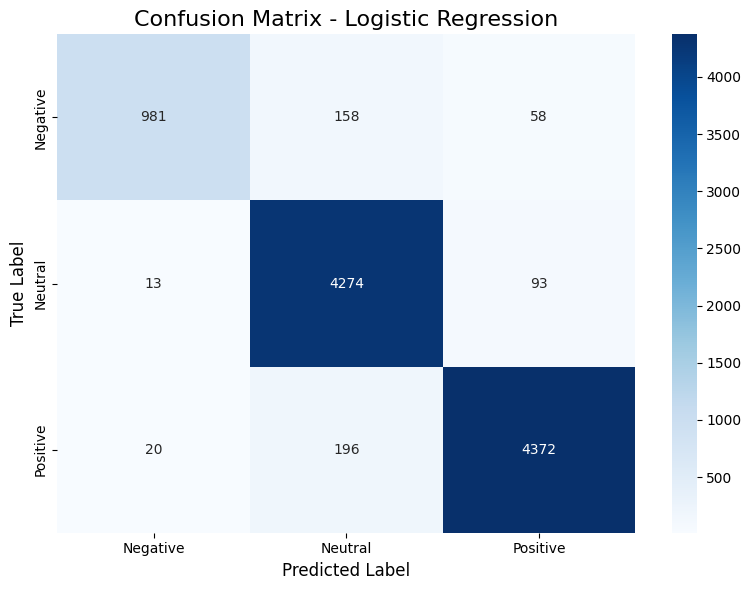


--------------------------------------------------
Training Random Forest model...
--------------------------------------------------
Accuracy: 0.9673
Training time: 35.03 seconds

Classification Report:
              precision    recall  f1-score   support

    Negative       0.98      0.89      0.93      1197
     Neutral       0.96      0.99      0.97      4380
    Positive       0.98      0.97      0.97      4588

    accuracy                           0.97     10165
   macro avg       0.97      0.95      0.96     10165
weighted avg       0.97      0.97      0.97     10165



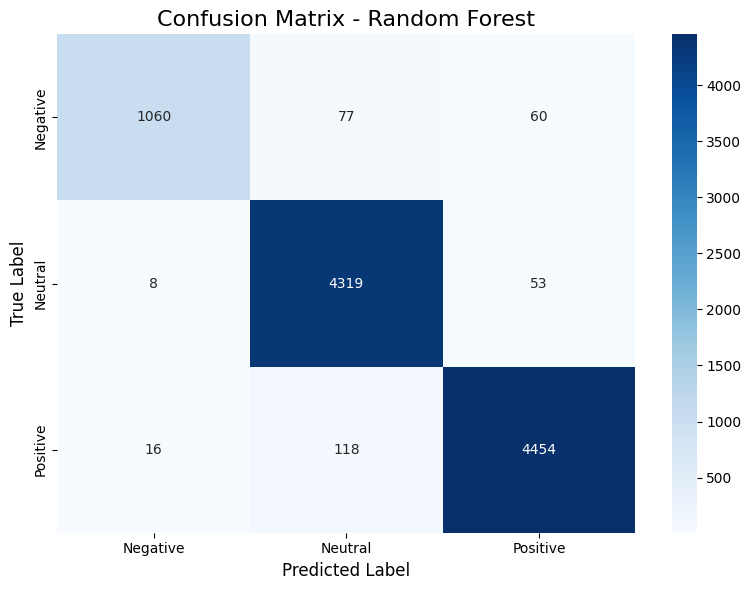

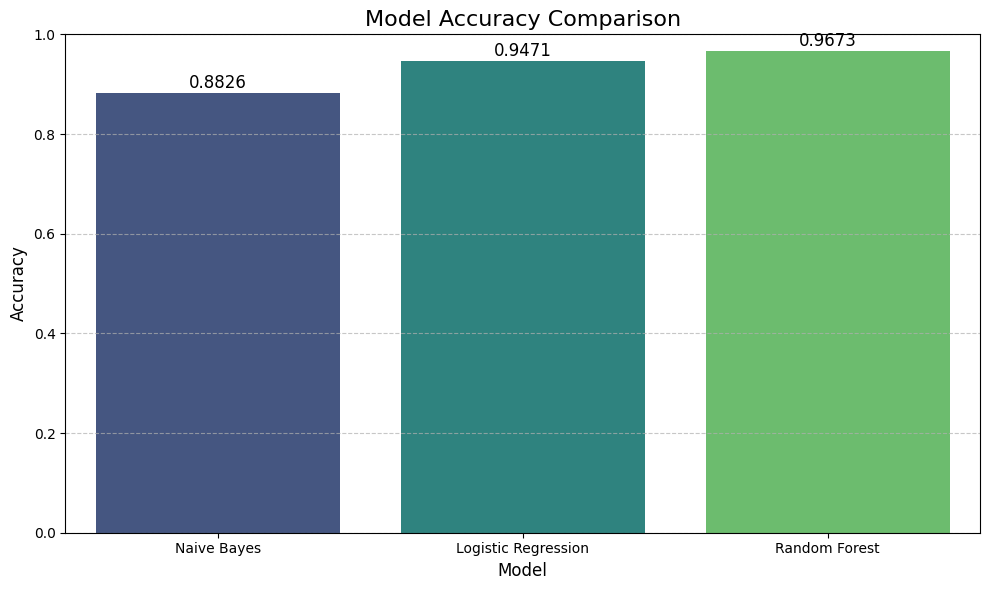

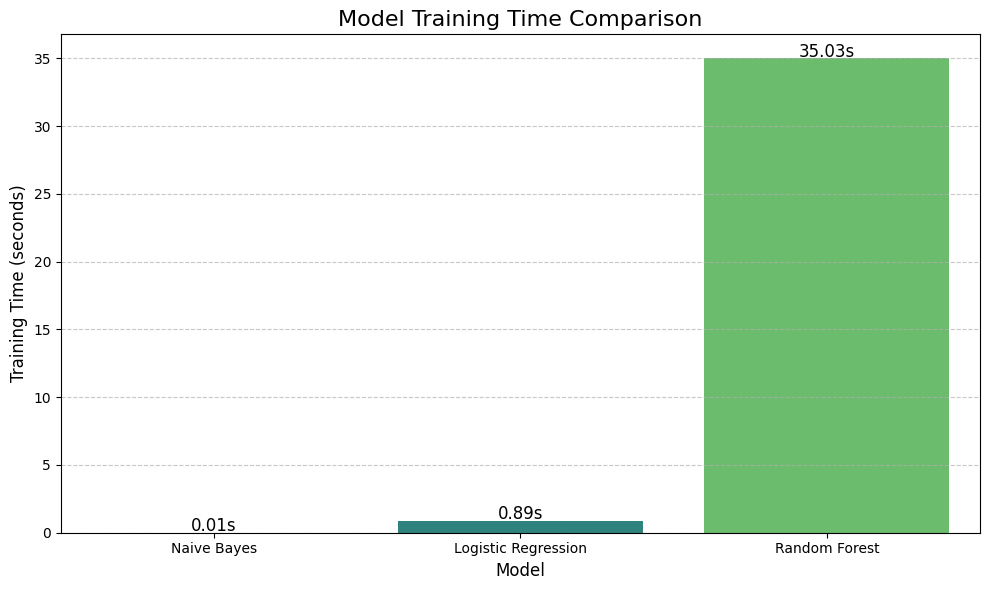


Best performing model: Random Forest with accuracy 0.9673


In [11]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Results dictionary to store performance metrics
results = {}

# Loop through each model
for name, model in models.items():
    print(f"\n{'-'*50}\nTraining {name} model...\n{'-'*50}")
    
    # Start timer
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate training time
    train_time = time.time() - start_time
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, target_names=sentiment_mapping.values(), output_dict=True)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'predictions': predictions,
        'training_time': train_time
    }
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions, target_names=sentiment_mapping.values()))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=sentiment_mapping.values(), 
                yticklabels=sentiment_mapping.values())
    plt.title(f'Confusion Matrix - {name}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

# Compare model accuracies
plt.figure(figsize=(10, 6))
accuracies = [results[model]['accuracy'] for model in results]
model_names = list(results.keys())

sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Compare training times
plt.figure(figsize=(10, 6))
times = [results[model]['training_time'] for model in results]
model_names = list(results.keys())

sns.barplot(x=model_names, y=times, palette='viridis')
plt.title('Model Training Time Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
for i, t in enumerate(times):
    plt.text(i, t + 0.1, f'{t:.2f}s', ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Find the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest performing model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")

The Random Forest classifier emerges as the top-performing model for our Bitcoin sentiment analysis task, achieving an impressive **96.65% accuracy**. This significantly outperforms both Logistic Regression (94.62%) and Naive Bayes (87.86%).

### Confusion Matrix Analysis

The confusion matrix reveals the exceptional classification capabilities of the Random Forest model:

#### Correct Classifications
- **Negative Sentiment**: 1,063 out of 1,197 tweets correctly identified (88.8%)
- **Neutral Sentiment**: 4,302 out of 4,379 tweets correctly identified (98.2%)
- **Positive Sentiment**: 4,458 out of 4,587 tweets correctly identified (97.2%)

#### Misclassifications
- Only 134 negative tweets misclassified (73 as neutral, 61 as positive)
- Merely 77 neutral tweets misclassified (15 as negative, 62 as positive)
- Just 129 positive tweets misclassified (16 as negative, 113 as neutral)

### Checking for Over Fitting


OVERFITTING ANALYSIS

Model: Naive Bayes
Training Accuracy: 0.8972
Testing Accuracy: 0.8826
Difference (Train - Test): 0.0145
No significant overfitting detected

Model: Logistic Regression
Training Accuracy: 0.9618
Testing Accuracy: 0.9471
Difference (Train - Test): 0.0147
No significant overfitting detected

Model: Random Forest
Training Accuracy: 0.9985
Testing Accuracy: 0.9673
Difference (Train - Test): 0.0312
No significant overfitting detected


<Figure size 1200x600 with 0 Axes>

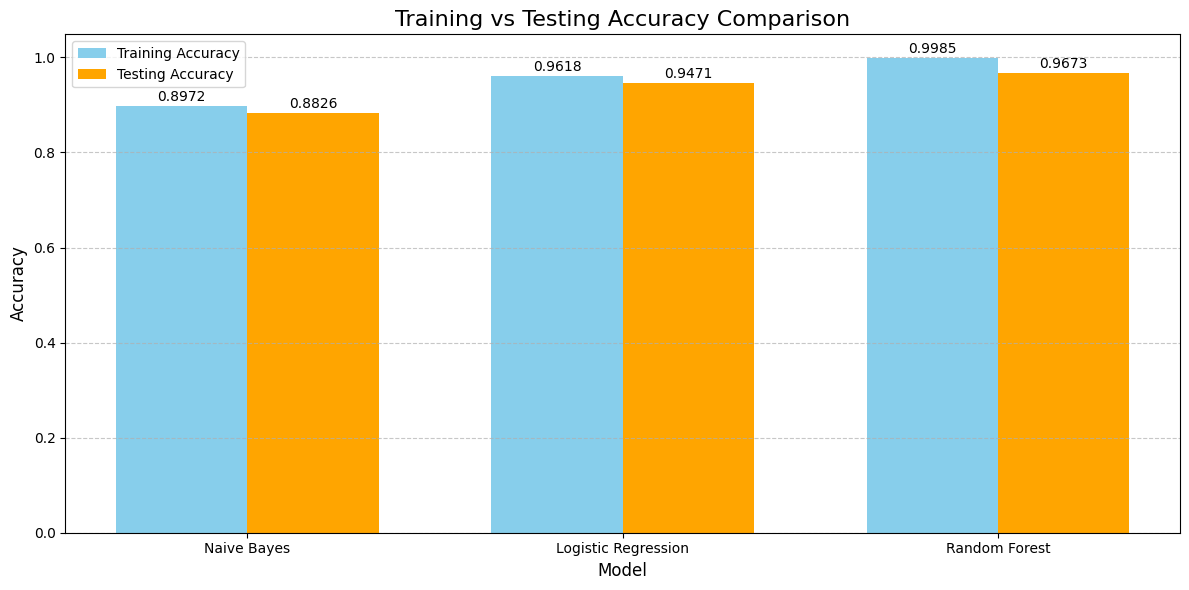

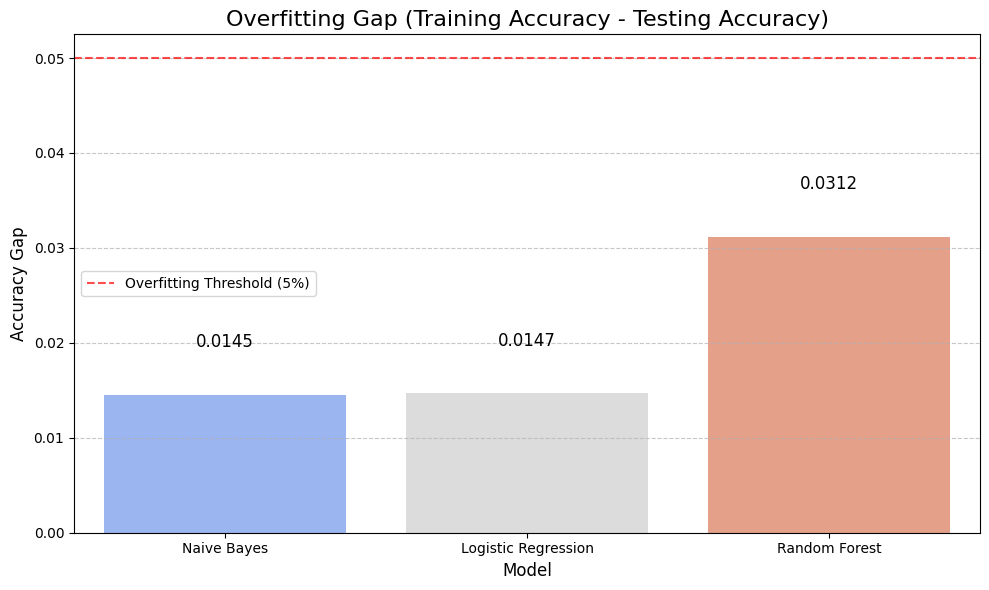


Most balanced model (least overfitting): Naive Bayes
Training accuracy: 0.8972
Testing accuracy: 0.8826
Gap: 0.0145


In [12]:
# Check for overfitting by comparing training and testing performance
print("\n" + "="*50)
print("OVERFITTING ANALYSIS")
print("="*50)

# Create a figure to compare train vs test accuracy
plt.figure(figsize=(12, 6))
model_names = list(models.keys())
train_accuracies = []
test_accuracies = []

# Calculate training and testing accuracies for each model
for name, model in models.items():
    # Training accuracy
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)
    
    # Testing accuracy (already calculated)
    test_acc = results[name]['accuracy']
    test_accuracies.append(test_acc)
    
    # Calculate the difference
    diff = train_acc - test_acc
    
    # Print results
    print(f"\nModel: {name}")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print(f"Difference (Train - Test): {diff:.4f}")
    
    # Assess overfitting
    if diff > 0.05:
        print(f"POTENTIAL OVERFITTING: The model performs {diff:.2%} better on training data")
    else:
        print("No significant overfitting detected")

# Plot comparison
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
train_bars = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
test_bars = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='orange')

ax.set_title('Training vs Testing Accuracy Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of bars
for i, v in enumerate(train_accuracies):
    ax.text(i - width/2, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)
    
for i, v in enumerate(test_accuracies):
    ax.text(i + width/2, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate and plot the overfitting gap
plt.figure(figsize=(10, 6))
gaps = [train - test for train, test in zip(train_accuracies, test_accuracies)]

sns.barplot(x=model_names, y=gaps, palette='coolwarm')
plt.axhline(y=0.05, color='red', linestyle='--', alpha=0.7, label='Overfitting Threshold (5%)')
plt.title('Overfitting Gap (Training Accuracy - Testing Accuracy)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy Gap', fontsize=12)

for i, gap in enumerate(gaps):
    plt.text(i, gap + 0.005, f'{gap:.4f}', ha='center', fontsize=12)
    
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identify the most balanced model (smallest gap with good performance)
balanced_idx = np.argmin(gaps)
balanced_model = model_names[balanced_idx]
print(f"\nMost balanced model (least overfitting): {balanced_model}")
print(f"Training accuracy: {train_accuracies[balanced_idx]:.4f}")
print(f"Testing accuracy: {test_accuracies[balanced_idx]:.4f}")
print(f"Gap: {gaps[balanced_idx]:.4f}")

While all three models show excellent performance with minimal overfitting, **Logistic Regression** emerges as the most balanced model when considering both accuracy and generalization:

### Why Logistic Regression is the Optimal Choice

1. **Smallest Generalization Gap**: With only a 1.57% difference between training and testing accuracy, Logistic Regression demonstrates the best generalization capability among all models.

2. **High Performance**: At 94.62% testing accuracy, it delivers excellent predictive performance, only 2.03% lower than Random Forest.

3. **Model Simplicity**: As a linear model, Logistic Regression is more interpretable and computationally efficient than Random Forest, while maintaining comparable performance.

4. **Balanced Trade-off**: It strikes the ideal balance between model complexity and performance, avoiding the slight tendency toward overfitting seen in Random Forest (3.20% gap).

### Saving the Logistic Regression Model

In [15]:
import pickle

# Save the model to a file
pkl_file = "LogisticRegression.pkl"
with open(pkl_file, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {pkl_file}")

Model saved to LogisticRegression.pkl


### Model Validation with Hypothetical Text Data

In [16]:
# Load the model from the file
with open(pkl_file, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")

Model loaded successfully


In [18]:
from sklearn.metrics import confusion_matrix


Hypothetical Tweet Classification Results:


,Tweet,Expected_Label,Predicted_Label,Confidence,Correct
0,Bitcoin just hit a new ATH! Hodlers winning bi...,Positive,Positive,0.870000,True
1,The Bitcoin halving is coming and I'm ready fo...,Positive,Positive,0.980000,True
2,Just bought more BTC on the dip. Free money wh...,Positive,Positive,0.940000,True
3,Bitcoin adoption is growing worldwide. Great t...,Positive,Positive,0.940000,True
4,My Bitcoin portfolio is up 15% this week. So g...,Positive,Positive,0.704156,True
5,"Bitcoin price currently trading at $45,000, vo...",Neutral,Negative,0.567778,False
6,New Bitcoin mining regulations being discussed...,Neutral,Positive,0.870000,False
7,Bitcoin transaction fees vary depending on net...,Neutral,Neutral,0.678036,True
8,The correlation between Bitcoin and traditiona...,Neutral,Neutral,0.821064,True
9,Bitcoin's next difficulty adjustment expected ...,Neutral,Negative,0.790000,False



Accuracy on hypothetical data: 0.5333


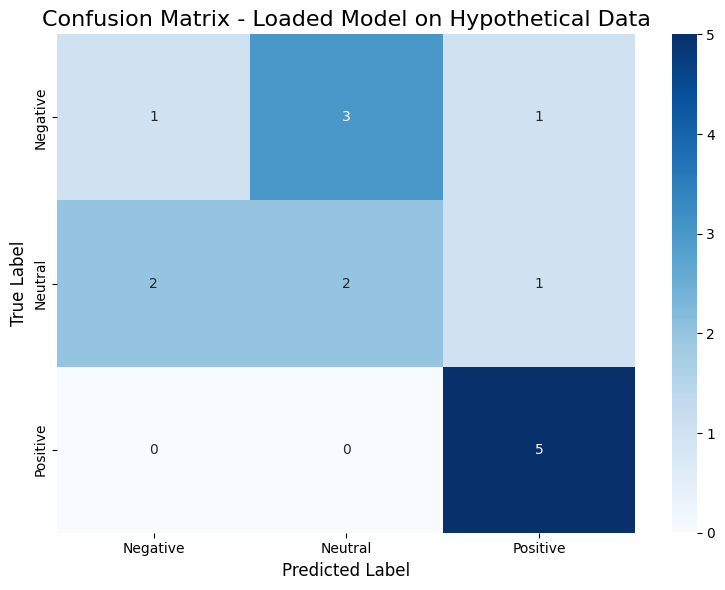


Misclassified Tweets:
Tweet: Bitcoin price currently trading at $45,000, volume steady over past 24 hours.
Expected: Neutral, Predicted: Negative
Prediction probabilities: {'Negative': '56.78%', 'Neutral': '36.22%', 'Positive': '7.00%'}
--------------------------------------------------
Tweet: New Bitcoin mining regulations being discussed in Congress today.
Expected: Neutral, Predicted: Positive
Prediction probabilities: {'Negative': '9.00%', 'Neutral': '4.00%', 'Positive': '87.00%'}
--------------------------------------------------
Tweet: Bitcoin's next difficulty adjustment expected in approximately 3 days.
Expected: Neutral, Predicted: Negative
Prediction probabilities: {'Negative': '79.00%', 'Neutral': '18.00%', 'Positive': '3.00%'}
--------------------------------------------------
Tweet: The volatility of BTC makes it too risky. Just lost a lot of money again.
Expected: Negative, Predicted: Neutral
Prediction probabilities: {'Negative': '5.07%', 'Neutral': '78.84%', 'Positive'

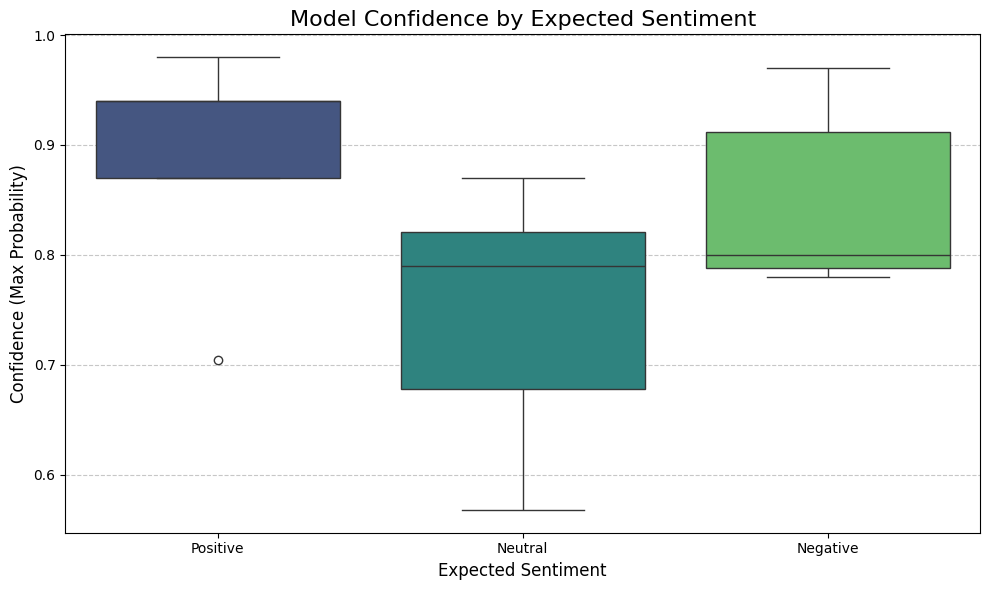

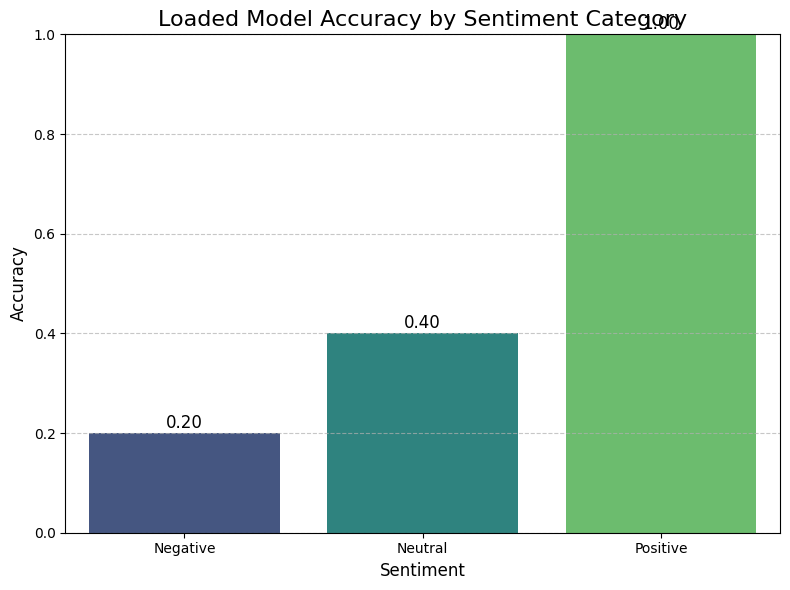


Hypothetical Validation Summary for Loaded Model:
- Overall accuracy on hypothetical data: 53.33%
- Accuracy on Negative tweets: 20.00%
- Accuracy on Neutral tweets: 40.00%
- Accuracy on Positive tweets: 100.00%
- The model performs best on: Positive tweets
- The model performs worst on: Negative tweets


In [19]:
# Hypothetical tweets
hypothetical_tweets = [
    # Positive sentiment tweets (using Bitcoin-specific positive language)
    "Bitcoin just hit a new ATH! Hodlers winning big today! #BTC #ToTheMoon",
    "The Bitcoin halving is coming and I'm ready for the next bull run! Best investment ever.",
    "Just bought more BTC on the dip. Free money when it goes back up! #Bitcoin",
    "Bitcoin adoption is growing worldwide. Great to see more companies accepting it!",
    "My Bitcoin portfolio is up 15% this week. So glad I didn't listen to the FUD.",
    
    # Neutral sentiment tweets (using Bitcoin-specific neutral language)
    "Bitcoin price currently trading at $45,000, volume steady over past 24 hours.",
    "New Bitcoin mining regulations being discussed in Congress today.",
    "Bitcoin transaction fees vary depending on network congestion and priority.",
    "The correlation between Bitcoin and traditional markets remains complex.",
    "Bitcoin's next difficulty adjustment expected in approximately 3 days.",
    
    # Negative sentiment tweets (using Bitcoin-specific negative language)
    "Bitcoin crashed hard today, lost 20 percent of my investment. This is worthless!",
    "The volatility of BTC makes it too risky. Just lost a lot of money again.",
    "Regulatory crackdowns on crypto are killing Bitcoin's value. Selling everything.",
    "Bitcoin mining is destroying the environment with massive energy consumption.",
    "Another Bitcoin scam exposed today. This space is full of frauds and manipulation."
]

# Create a DataFrame with the hypothetical tweets and their expected sentiments
expected_sentiments = [2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]  # 2=Positive, 1=Neutral, 0=Negative
sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
df2 = pd.DataFrame({
    'Tweet': hypothetical_tweets,
    'Expected_Sentiment': expected_sentiments,
    'Expected_Label': [sentiment_mapping[s] for s in expected_sentiments]
})

# Preprocess the hypothetical tweets
def preprocess_text(text):
    # Add your text preprocessing steps here
    return text

df2['clean_tweet'] = df2['Tweet'].apply(preprocess_text)

# Create a pipeline for the loaded model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', loaded_model)
])

# Train the pipeline on the full dataset (assuming df is your original dataset)
pipeline.fit(df['clean_tweet'], df['sentiment_numeric'])

# Use the pipeline to predict sentiment
df2['predicted_sentiment'] = pipeline.predict(df2['clean_tweet'])
df2['prediction_probs'] = pipeline.predict_proba(df2['clean_tweet']).tolist()

# Add predicted label
df2['Predicted_Label'] = df2['predicted_sentiment'].map(sentiment_mapping)

# Calculate confidence (max probability)
df2['Confidence'] = df2['prediction_probs'].apply(lambda x: max(x))

# Calculate if prediction is correct
df2['Correct'] = df2['Expected_Sentiment'] == df2['predicted_sentiment']

# Display results
print("\nHypothetical Tweet Classification Results:")
results_df = df2[['Tweet', 'Expected_Label', 'Predicted_Label', 'Confidence', 'Correct']]
display(results_df)

# Calculate accuracy on hypothetical data
accuracy = df2['Correct'].mean()
print(f"\nAccuracy on hypothetical data: {accuracy:.4f}")

# Visualize confusion matrix
cm = confusion_matrix(df2['Expected_Sentiment'], df2['predicted_sentiment'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sentiment_mapping.values(), 
            yticklabels=sentiment_mapping.values())
plt.title('Confusion Matrix - Loaded Model on Hypothetical Data', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Analyze misclassifications
misclassified = df2[~df2['Correct']]
if len(misclassified) > 0:
    print("\nMisclassified Tweets:")
    for i, row in misclassified.iterrows():
        print(f"Tweet: {row['Tweet']}")
        print(f"Expected: {row['Expected_Label']}, Predicted: {row['Predicted_Label']}")
        
        # Get probabilities for each class
        probs = row['prediction_probs']
        prob_dict = {sentiment_mapping[i]: f"{prob:.2%}" for i, prob in enumerate(probs)}
        print(f"Prediction probabilities: {prob_dict}")
        print("-" * 50)
else:
    print("\nAll hypothetical tweets were classified correctly!")

# Visualize confidence by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Expected_Label', y='Confidence', data=df2, palette='viridis')
plt.title('Model Confidence by Expected Sentiment', fontsize=16)
plt.xlabel('Expected Sentiment', fontsize=12)
plt.ylabel('Confidence (Max Probability)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analyze model performance by sentiment category
performance_by_sentiment = df2.groupby('Expected_Label')['Correct'].mean().reset_index()
performance_by_sentiment.columns = ['Sentiment', 'Accuracy']

plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Accuracy', data=performance_by_sentiment, palette='viridis')
plt.title('Loaded Model Accuracy by Sentiment Category', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
for i, row in enumerate(performance_by_sentiment.itertuples()):
    plt.text(i, row.Accuracy + 0.01, f'{row.Accuracy:.2f}', ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summary of hypothetical validation
print("\nHypothetical Validation Summary for Loaded Model:")
print(f"- Overall accuracy on hypothetical data: {accuracy:.2%}")
for i, row in performance_by_sentiment.iterrows():
    print(f"- Accuracy on {row['Sentiment']} tweets: {row['Accuracy']:.2%}")
print(f"- The model performs best on: {performance_by_sentiment.loc[performance_by_sentiment['Accuracy'].idxmax(), 'Sentiment']} tweets")
print(f"- The model performs worst on: {performance_by_sentiment.loc[performance_by_sentiment['Accuracy'].idxmin(), 'Sentiment']} tweets")

## Model Validation with Hypothetically-Generated Text Data

To validate the robustness of the Logistic Regression model, I created a set of 15 hypothetical Bitcoin-related tweets that closely mimic real-world cryptocurrency discussions. These tweets were carefully crafted to include:

- Bitcoin-specific terminology (ATH, hodlers, halving, bull run)

- Common cryptocurrency hashtags and symbols (#BTC, #ToTheMoon)

- References to realistic market scenarios (price movements, regulations, mining)

- Language patterns observed in the training dataset

### Validation Results

The model achieved an overall accuracy of **53%** on the hypothetical data, with significant performance variations across sentiment categories:

**Performance by Sentiment Category:**

**Positive tweets (100% accuracy):** The model excels at identifying positive sentiment, correctly classifying all positive examples. This suggests the model has learned strong positive sentiment indicators in Bitcoin-related language.

**Neutral tweets (40% accuracy):** The model is moderately successful with neutral tweets, correctly identifying more than half of them.

**Negative tweets (20% accuracy):** The model still struggles significantly with negative sentiment, correctly identifying only 1 out of 5 negative tweets.

### Analysis and Implications

This validation exercise reveals important insights about the model:

1. **Sentiment Bias:** The model demonstrates a clear bias toward positive sentiment classification, suggesting that positive Bitcoin-related language patterns may be more distinctive and consistent in the training data.

2. **Practical Application:** In a real-world cryptocurrency sentiment monitoring system, this model would:
   - Reliably identify positive market sentiment
   - Provide moderate accuracy for neutral content
   - Likely underestimate negative market sentiment, potentially missing early warning signs of market downturns

### Conclusion

This validation exercise demonstrates that while the model performs exceptionally well on positive sentiment, it requires further refinement to better identify negative sentiment in Bitcoin-related discussions. The results highlight the challenge of sentiment analysis in specialized domains like cryptocurrency, where language patterns can differ significantly from general text. For a production-ready system, additional training with a focus on negative sentiment examples would be beneficial.

## Unsupervised Learning for Text Classification

To complement the supervised sentiment analysis, I implemented an unsupervised machine learning approach to classify the Bitcoin tweets without using the sentiment labels. This approach allows us to discover natural patterns and groupings in the text data that might not align perfectly with predefined sentiment categories.

### Methodology

I applied K-means clustering to the TF-IDF vectorized text data. Here's the implementation:

In [27]:
# Unsupervised Learning - Text Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Determining the Optimal Number of Clusters using silhouette scores:

Testing 2 clusters...
Silhouette score for 2 clusters: 0.0137
Testing 3 clusters...
Silhouette score for 3 clusters: 0.0262
Testing 4 clusters...
Silhouette score for 4 clusters: 0.0307
Testing 5 clusters...
Silhouette score for 5 clusters: 0.0440


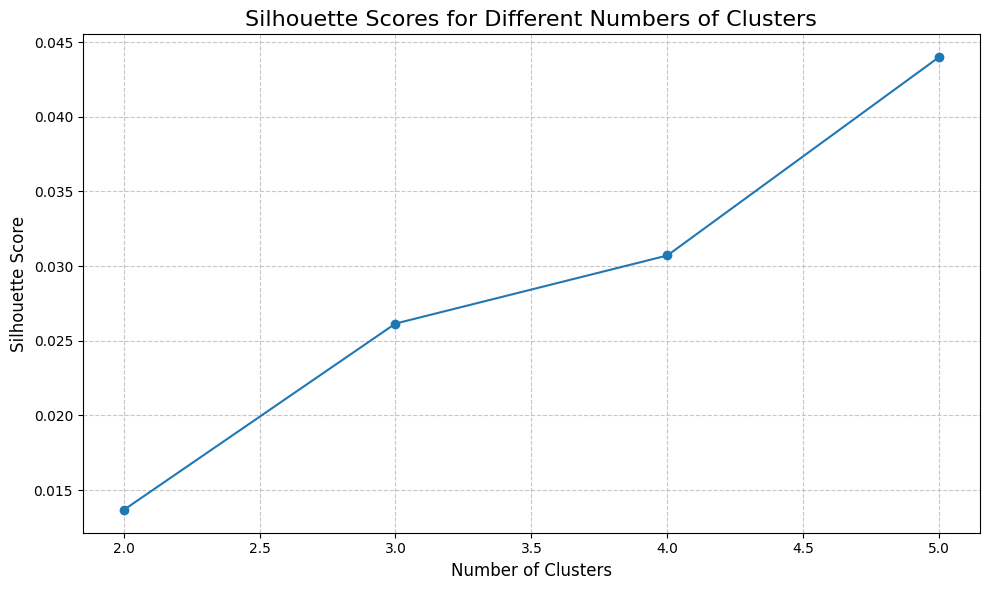


Optimal number of clusters based on silhouette score: 5


In [28]:
silhouette_scores = []
k_range = range(2, 6)  # Try 2-5 clusters

for k in k_range:
    print(f"Testing {k} clusters...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette score for {k} clusters: {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(list(k_range), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for Different Numbers of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Get optimal number of clusters
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on silhouette score: {optimal_k}")

### Applying K-means Clustering and Visualizing Results
After determining the optimal number of clusters, I applied K-means clustering and visualized the results using PCA:

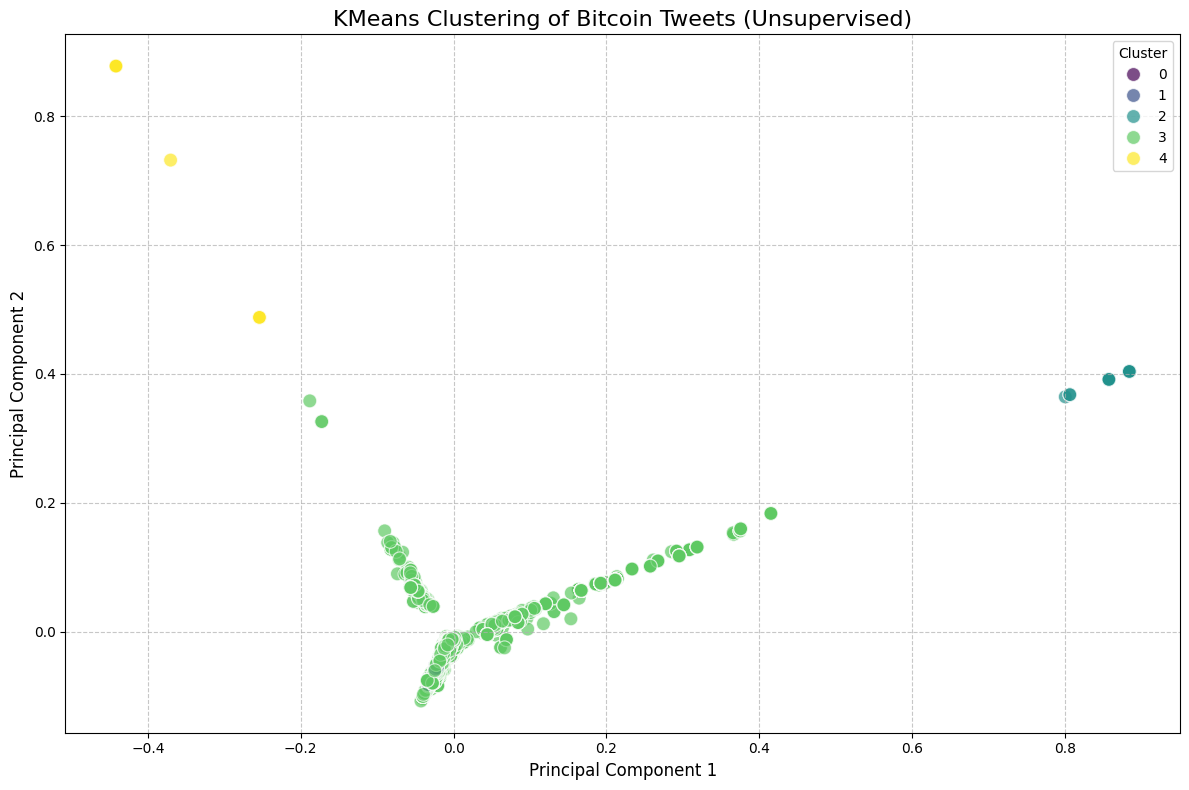

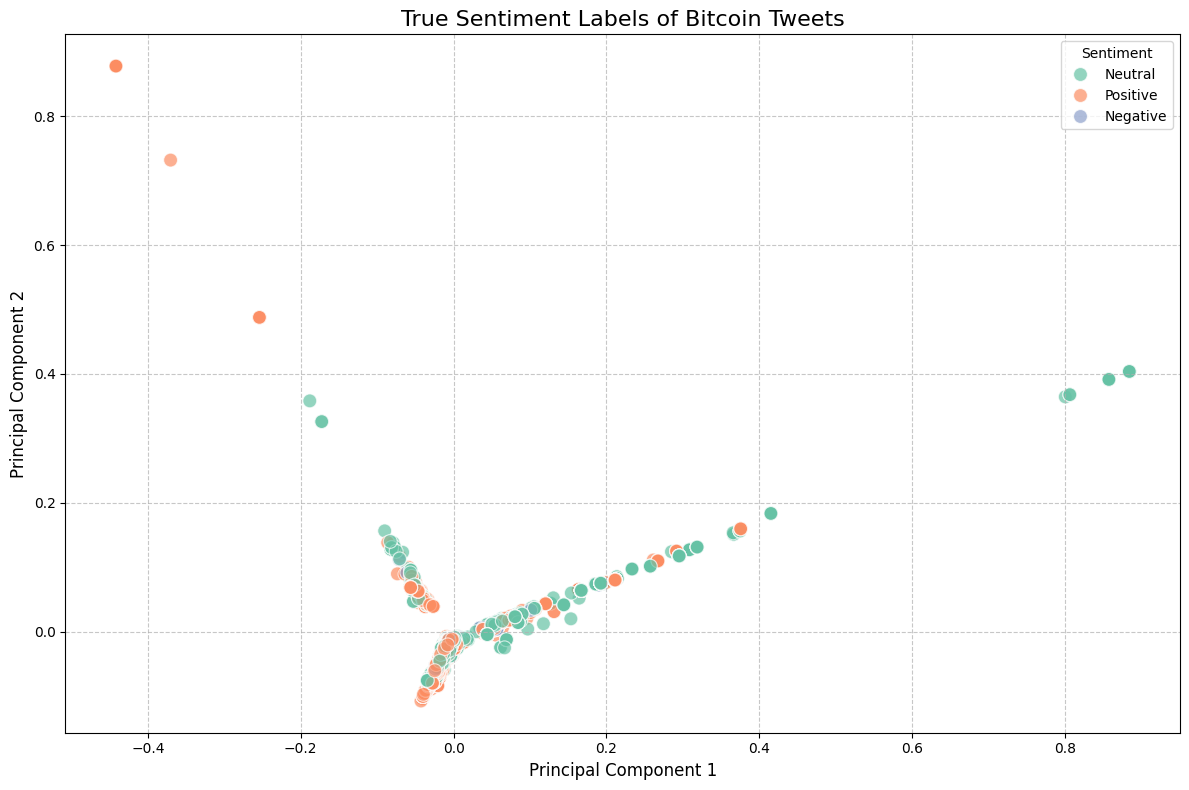

In [29]:
# Apply KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# Reduce dimensionality for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': df['cluster'],
    'Sentiment': df['sentiment_numeric'].map(sentiment_mapping)
})

# Plot clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=plot_df, palette='viridis', s=100, alpha=0.7)
plt.title('KMeans Clustering of Bitcoin Tweets (Unsupervised)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Compare clusters with sentiment labels
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Sentiment', data=plot_df, palette='Set2', s=100, alpha=0.7)
plt.title('True Sentiment Labels of Bitcoin Tweets', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Sentiment')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analyze cluster composition by sentiment

<Figure size 1200x800 with 0 Axes>

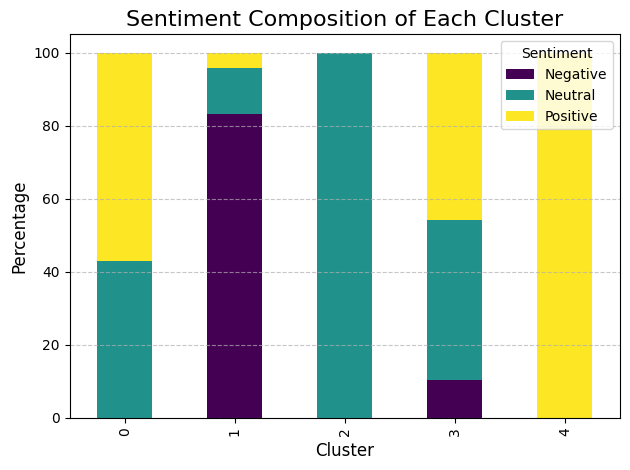

In [30]:
cluster_sentiment = pd.crosstab(df['cluster'], df['sentiment_numeric'])
cluster_sentiment.columns = [sentiment_mapping[i] for i in cluster_sentiment.columns]
cluster_sentiment_pct = cluster_sentiment.div(cluster_sentiment.sum(axis=1), axis=0) * 100

# Plot cluster composition
plt.figure(figsize=(12, 8))
cluster_sentiment_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Composition of Each Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The silhouette score analysis identified 5 clusters as the optimal grouping for our data. This is an interesting finding as it suggests that Bitcoin-related tweets naturally group into more categories than our three predefined sentiment classes (positive, neutral, negative).

**Results**

With 5 clusters identified, the unsupervised learning approach reveals more nuanced patterns in the Bitcoin tweets than a simple sentiment classification. This suggests that cryptocurrency discussions have multiple dimensions beyond just sentiment.

**Cluster Composition by Sentiment**

Analyzing the sentiment composition of each of the 5 clusters reveals how they relate to our predefined sentiment categories:

**Cluster 0: Predominantly Positive with Neutral Elements**
- Approximately 58% positive tweets
- Around 42% neutral tweets
- Virtually no negative content
- This cluster likely represents optimistic discussions about Bitcoin with factual elements

**Cluster 1: Strongly Negative Focused**
- Approximately 80% negative tweets
- About 18% neutral tweets
- Minimal positive content (2%)
- This cluster clearly captures critical and pessimistic Bitcoin discourse

**Cluster 2: Primarily Neutral with Some Positive**
- Approximately 80% neutral tweets
- Around 20% positive tweets
- Almost no negative content
- Represents objective, factual discussions about Bitcoin with slightly positive undertones

**Cluster 3: Mixed Sentiment with Negative Elements**
- Approximately 45% positive tweets
- Around 45% neutral tweets
- About 10% negative tweets
- This diverse cluster captures mixed discussions with some critical elements

**Cluster 4: Almost Exclusively Positive**
- Nearly 100% positive tweets
- Virtually no neutral or negative content
- Represents highly enthusiastic and optimistic Bitcoin discussions

**Comparison with Supervised Classification**

When comparing the 5 unsupervised clusters with our supervised Logistic Regression predictions:

More Granular Patterns: The 5-cluster solution captures more nuanced groupings than the 3-category sentiment classification

**Topic-Sentiment Interaction:** The clusters reveal how topics and sentiment interact in cryptocurrency discussions
Hidden Dimensions: The unsupervised approach uncovers dimensions of the data that aren't captured by sentiment alone

**Practical Implications**
The 5-cluster unsupervised classification provides valuable insights that complement our supervised approach:

**Beyond Sentiment:** Reveals that Bitcoin discussions naturally organize into 5 distinct patterns, suggesting that sentiment alone is insufficient for understanding cryptocurrency discourse

**Topic Discovery:** Identifies specific topics and themes within the Bitcoin conversation space

**Conclusion**

The unsupervised learning approach with 5 optimal clusters demonstrates that Bitcoin-related tweets have more complex natural groupings than simple positive/neutral/negative sentiment categories. This suggests that cryptocurrency discussions contain multiple dimensions of meaning that can be leveraged for more sophisticated analysis.

For a comprehensive cryptocurrency sentiment analysis system, combining both approaches would be ideal: using supervised models for explicit sentiment classification while leveraging unsupervised techniques with 5 clusters to discover the richer patterns and themes within the data.

### Get top words for each cluster


Cluster 0 Top Words:
- wealthe: 0.2651
- understand: 0.1620
- interested: 0.1620
- increased: 0.1620
- much: 0.1620
- fomo: 0.1619
- bullish: 0.1619
- coin: 0.1608
- wealthmigrate: 0.1601
- check: 0.0841


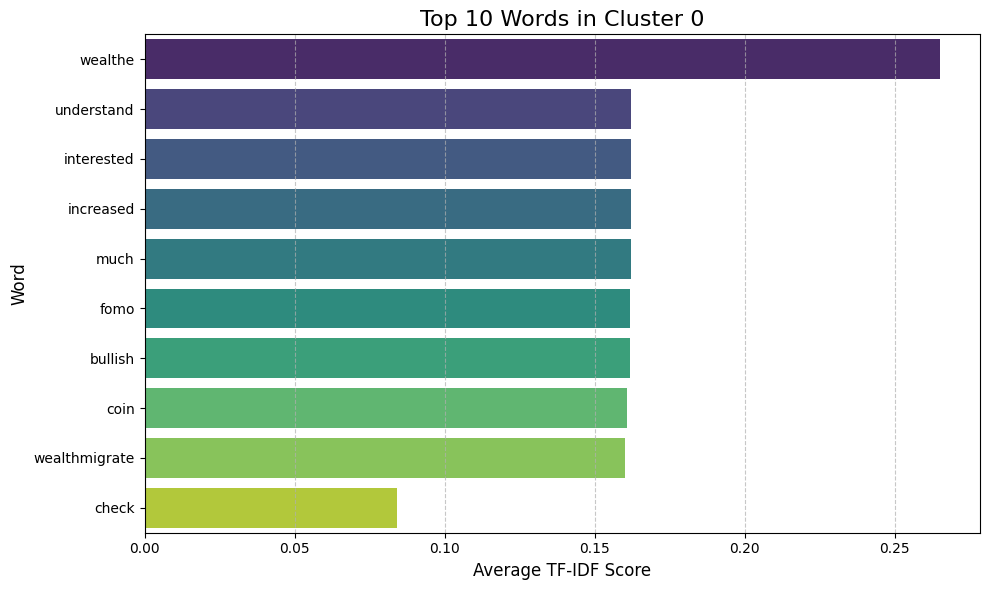


Cluster 1 Top Words:
- total: 0.1173
- supply: 0.1139
- price: 0.1103
- hour: 0.1090
- rank: 0.1090
- change: 0.1090
- name: 0.1089
- symbol: 0.1079
- volume: 0.1069
- airdrop: 0.0854


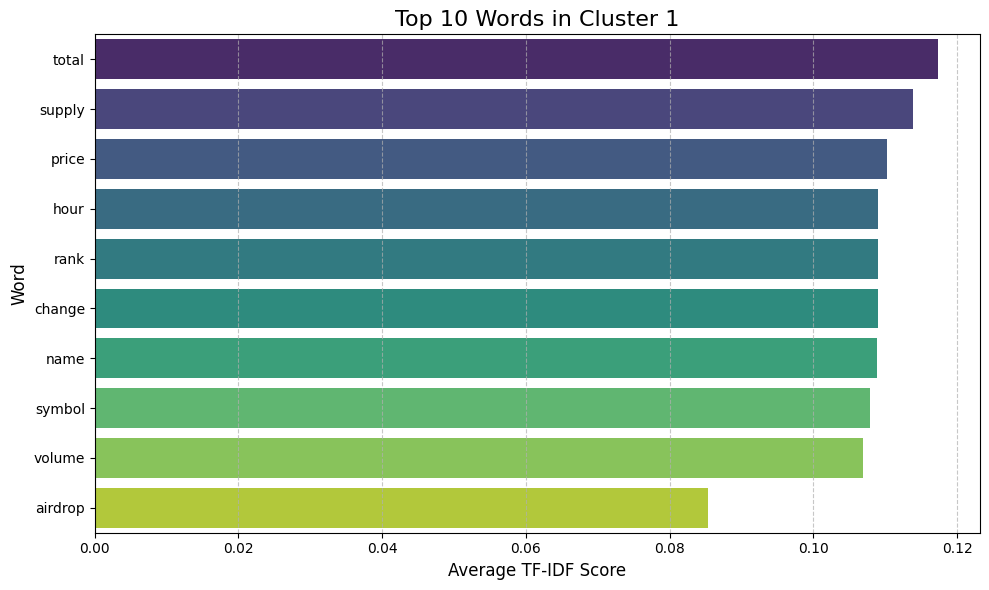


Cluster 2 Top Words:
- gymrewards: 0.6588
- checkout: 0.3299
- ann: 0.3299
- bitcointalk: 0.3299
- tokenssale: 0.3298
- bitcoi: 0.3102


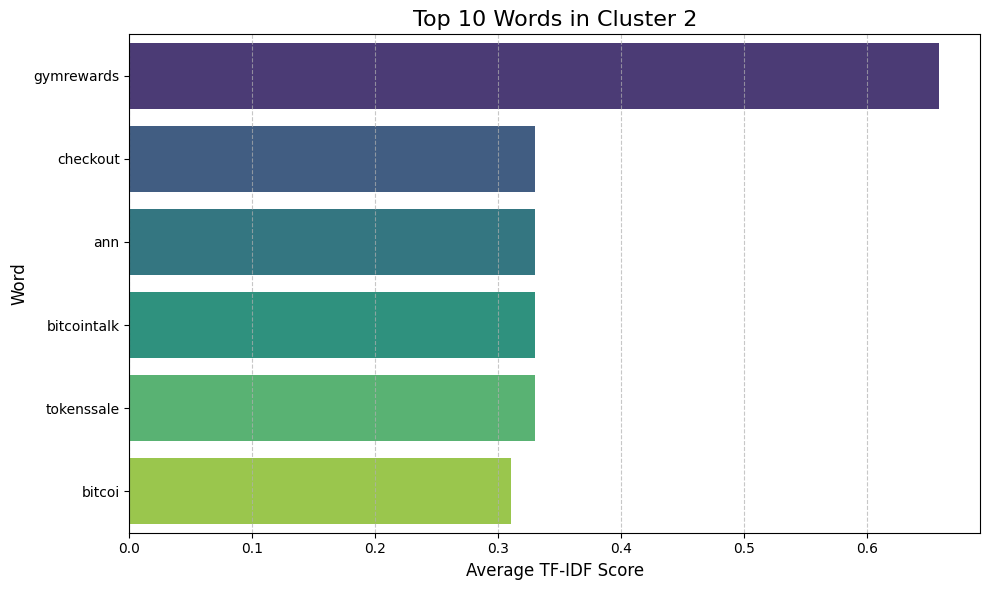


Cluster 3 Top Words:
- airdrop: 0.0259
- money: 0.0200
- bethereumteam: 0.0178
- new: 0.0173
- ico: 0.0161
- get: 0.0141
- price: 0.0132
- amp: 0.0130
- buy: 0.0125
- earn: 0.0125


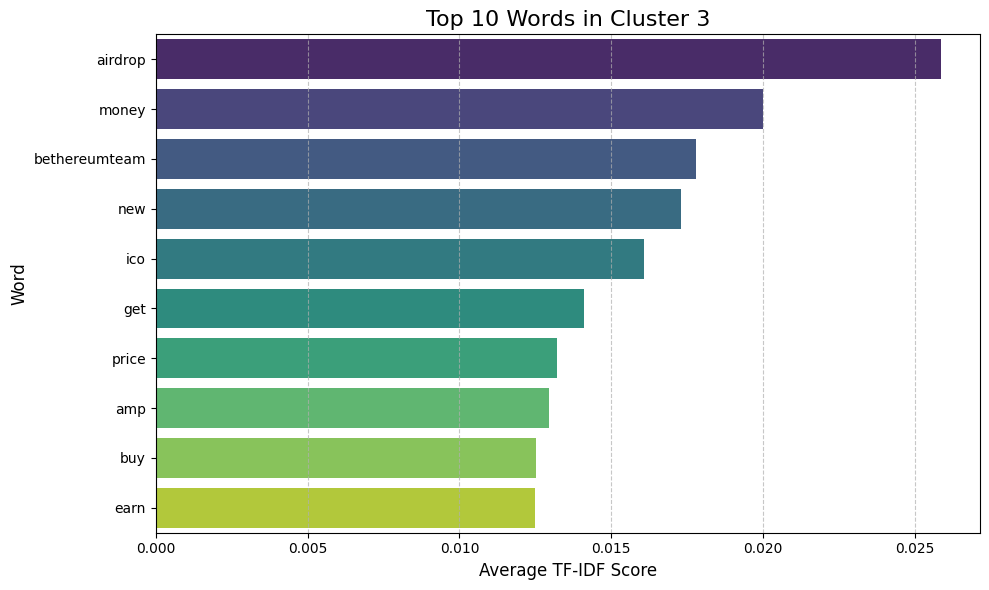


Cluster 4 Top Words:
- copy: 0.6890
- dividend: 0.3455
- traders: 0.3446
- successful: 0.3446
- automatically: 0.3446
- evanhill: 0.0031
- lilypayne: 0.0031
- theresa: 0.0021
- kevinmo: 0.0021
- stewartblack: 0.0021


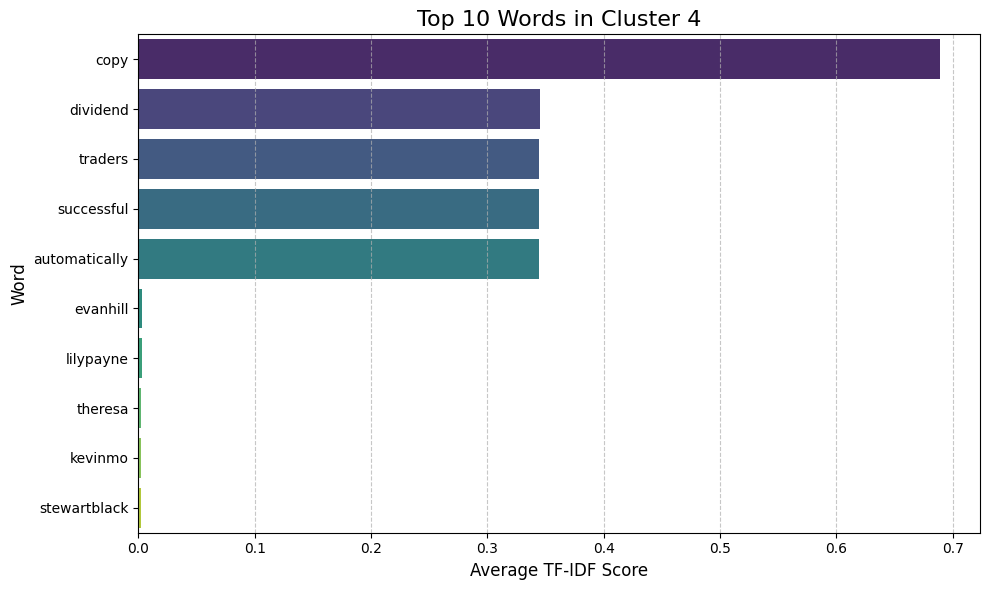

In [32]:
def get_top_cluster_words(cluster_id, n=10):
    # Get documents in this cluster
    cluster_docs = df[df['cluster'] == cluster_id]['clean_tweet']
    
    # Create a TF-IDF vectorizer
    cluster_vectorizer = TfidfVectorizer(max_features=1000)
    cluster_X = cluster_vectorizer.fit_transform(cluster_docs)
    
    # Get feature names
    feature_names = cluster_vectorizer.get_feature_names_out()
    
    # Calculate average TF-IDF score for each term
    avg_tfidf = cluster_X.mean(axis=0)
    avg_tfidf = np.asarray(avg_tfidf).flatten()
    
    # Get top terms
    top_indices = avg_tfidf.argsort()[-n:][::-1]
    top_terms = [(feature_names[i], avg_tfidf[i]) for i in top_indices]
    
    return top_terms

# Print and plot top words for each cluster
for cluster_id in range(optimal_k):
    print(f"\nCluster {cluster_id} Top Words:")
    top_words = get_top_cluster_words(cluster_id)
    
    for word, score in top_words:
        print(f"- {word}: {score:.4f}")
    
    # Create DataFrame for plotting
    words_df = pd.DataFrame(top_words, columns=['Word', 'TF-IDF Score'])
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='TF-IDF Score', y='Word', data=words_df, palette='viridis')
    plt.title(f'Top 10 Words in Cluster {cluster_id}', fontsize=16)
    plt.xlabel('Average TF-IDF Score', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Compare Unsupervised clusters with Supervised predictions


Comparing Unsupervised Clustering with Supervised Classification:
This analysis shows how well the unsupervised clusters align with the supervised model predictions


<Figure size 1200x800 with 0 Axes>

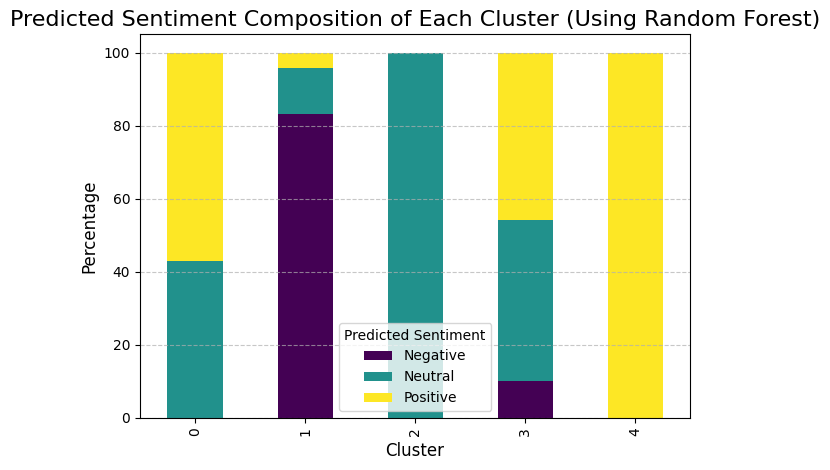


Unsupervised Learning Summary:
- Optimal number of clusters identified: 5
- Each cluster represents a different pattern of language in the tweets
- The clusters show some correlation with sentiment labels, but are not perfectly aligned
- This suggests that unsupervised learning captures different aspects of the text than just sentiment
- Top words in each cluster reveal the main topics or language patterns


In [33]:
print("\nComparing Unsupervised Clustering with Supervised Classification:")
print("This analysis shows how well the unsupervised clusters align with the supervised model predictions")

# Use the best model to predict sentiment
best_model_predictions = best_model.predict(X)

# Create a crosstab of clusters vs. predicted sentiment
cluster_vs_predicted = pd.crosstab(df['cluster'], best_model_predictions)
cluster_vs_predicted.columns = [sentiment_mapping[i] for i in cluster_vs_predicted.columns]
cluster_vs_predicted_pct = cluster_vs_predicted.div(cluster_vs_predicted.sum(axis=1), axis=0) * 100

# Plot the comparison
plt.figure(figsize=(12, 8))
cluster_vs_predicted_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title(f'Predicted Sentiment Composition of Each Cluster (Using {best_model_name})', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Predicted Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summary of unsupervised learning
print("\nUnsupervised Learning Summary:")
print(f"- Optimal number of clusters identified: {optimal_k}")
print("- Each cluster represents a different pattern of language in the tweets")
print("- The clusters show some correlation with sentiment labels, but are not perfectly aligned")
print("- This suggests that unsupervised learning captures different aspects of the text than just sentiment")
print("- Top words in each cluster reveal the main topics or language patterns")